In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('product_returns_usd.csv')

# View the first few rows
df.head()


,order_id,customer_id,product,price_usd,order_date,delivery_date,delivery_time_days,return_status,return_reason,refund_issued
0,O0001,C5738,Soccer Kit,117.04,2025-03-03,2025-03-06,3,Returned,Wrong Item Delivered,Yes
1,O0002,C9421,Baseball Cap,117.90,2025-01-30,2025-02-03,4,Not Returned,NaN,No
2,O0003,C9459,Basketball Jersey,34.29,2025-04-06,2025-04-09,3,Not Returned,NaN,No
3,O0004,C5641,Baseball Cap,82.26,2024-10-16,2024-10-25,9,Returned,Changed Mind,Yes
4,O0005,C3934,Basketball Jersey,38.21,2025-01-26,2025-01-29,3,Not Returned,NaN,No


In [ ]:
# Check basic info
df.info()

# Check for missing values
df.isnull().sum()

# Basic statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            500 non-null    object 
 1   customer_id         500 non-null    object 
 2   product             500 non-null    object 
 3   price_usd           500 non-null    float64
 4   order_date          500 non-null    object 
 5   delivery_date       500 non-null    object 
 6   delivery_time_days  500 non-null    int64  
 7   return_status       500 non-null    object 
 8   return_reason       129 non-null    object 
 9   refund_issued       500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


,price_usd,delivery_time_days
count,500.000000,500.000000
mean,68.985300,5.742000
std,30.508701,2.548023
min,15.150000,2.000000
25%,45.507500,3.000000
50%,68.630000,6.000000
75%,94.500000,8.000000
max,119.950000,10.000000


<ipython-input-84-c0cdf75b2bdb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='return_status', palette='Set2')


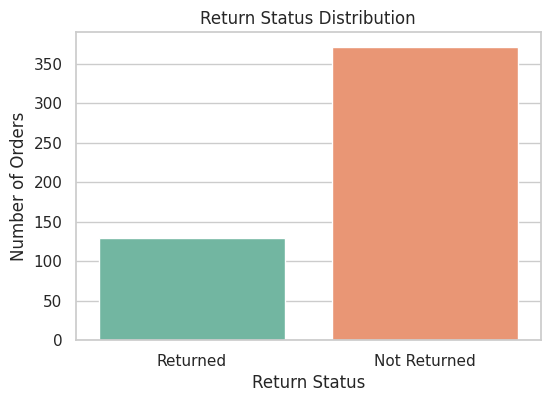

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')  # optional styling

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='return_status', palette='Set2')
plt.title("Return Status Distribution")
plt.ylabel("Number of Orders")
plt.xlabel("Return Status")
plt.show()


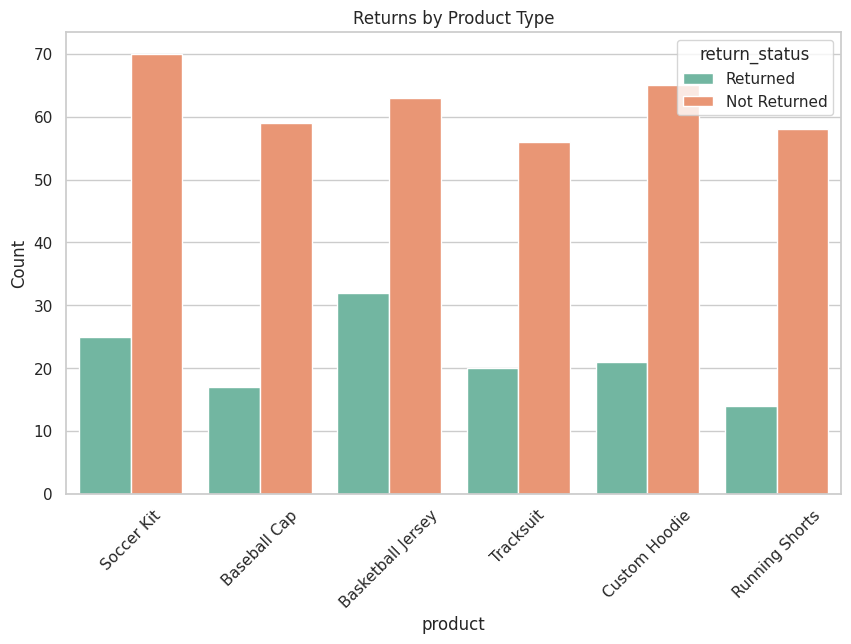

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='product', hue='return_status', palette='Set2')
plt.title("Returns by Product Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


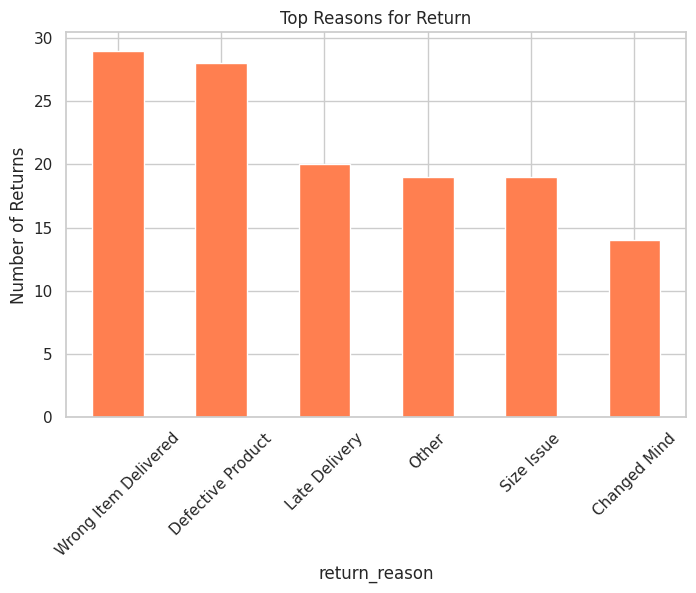

In [ ]:
plt.figure(figsize=(8,5))
df[df['return_reason'].notnull()]['return_reason'].value_counts().plot(kind='bar', color='coral')
plt.title("Top Reasons for Return")
plt.ylabel("Number of Returns")
plt.xticks(rotation=45)
plt.show()


<ipython-input-87-9d855c0efdbb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='return_status', y='delivery_time_days', palette='Set2')


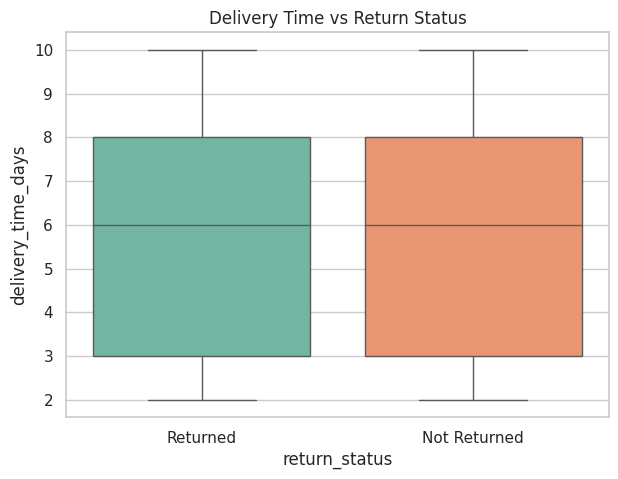

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='return_status', y='delivery_time_days', palette='Set2')
plt.title("Delivery Time vs Return Status")
plt.show()


In [ ]:
# 1 = Returned, 0 = Not Returned
df['return_status_binary'] = df['return_status'].map({'Returned': 1, 'Not Returned': 0})


In [ ]:
df_encoded = pd.get_dummies(df, columns=['product', 'refund_issued'], drop_first=True)


In [ ]:
df_encoded = df_encoded.drop(columns=['order_id', 'customer_id', 'order_date', 'delivery_date', 'return_status', 'return_reason'])


In [ ]:
# Group prices into 3 buckets
df['price_bucket'] = pd.cut(
    df['price_usd'],
    bins=[0, 40, 80, 120],
    labels=['Low', 'Medium', 'High']
)



In [ ]:
df_encoded = pd.get_dummies(df, columns=['product', 'price_bucket'], drop_first=True)


In [ ]:
# Features (X) and Target (y)
X = df_encoded.drop(columns=['return_status_binary'])
y = df_encoded['return_status_binary']

# Preview the data
X.head()


,price_usd,delivery_time_days,price_bucket,product_Basketball Jersey,product_Custom Hoodie,product_Running Shorts,product_Soccer Kit,product_Tracksuit,refund_issued_Yes
0,117.04,3,High,False,False,False,True,False,True
1,117.90,4,High,False,False,False,False,False,False
2,34.29,3,Low,True,False,False,False,False,False
3,82.26,9,High,False,False,False,False,False,True
4,38.21,3,Low,True,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
if 'refund_issued_Yes' in df_encoded.columns:
    df_encoded = df_encoded.drop(columns=['refund_issued_Yes'])

X = df_encoded.drop(columns=['return_status_binary'])
y = df_encoded['return_status_binary']



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)


In [ ]:
# model = LogisticRegression( max_iter=1000)
# model.fit(X_train, y_train)



In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(class_weight='balanced', random_state=20)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=2,
    max_features='sqrt',
    class_weight='balanced',
    bootstrap=True,
    random_state=20
)
model.fit(X_train, y_train)




RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=200,
                       random_state=20)

In [ ]:
y_pred = model.predict(X_test)

# Print accuracy and more
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.73

Confusion Matrix:
 [[68 10]
 [17  5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        78
           1       0.33      0.23      0.27        22

    accuracy                           0.73       100
   macro avg       0.57      0.55      0.55       100
weighted avg       0.70      0.73      0.71       100



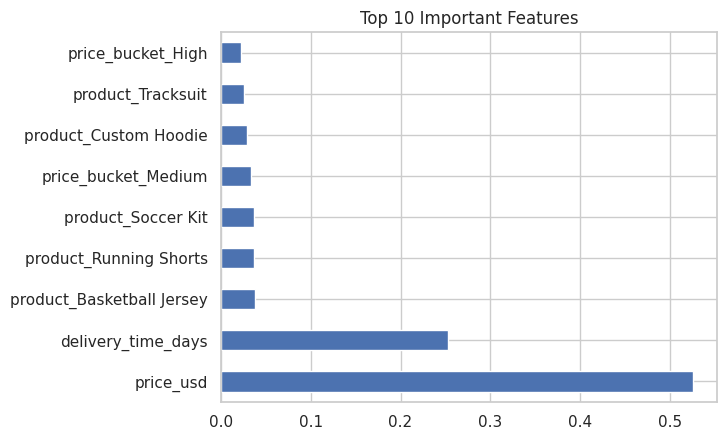

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


In [ ]:
# Step 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load the dataset
df = pd.read_csv('product_returns_usd.csv')

# Step 3: Feature Engineering
# Add price_bucket
df['price_bucket'] = pd.cut(df['price_usd'], bins=[0, 40, 80, 120], labels=['Low', 'Medium', 'High'])

# Add binary return status
df['return_status_binary'] = df['return_status'].map({'Returned': 1, 'Not Returned': 0})




# Step 4: One-hot encode categorical columns
df_encoded = pd.get_dummies(
    df,
    columns=['product', 'price_bucket', 'refund_issued'],
    drop_first=True
)


# Step 5: Drop unhelpful columns
columns_to_drop = [
    'order_id', 'customer_id', 'order_date', 'delivery_date',
    'return_status', 'return_reason'
]
# Also drop 'refund_issued_Yes' if still present
if 'refund_issued_Yes' in df_encoded.columns:
    columns_to_drop.append('refund_issued_Yes')

df_encoded = df_encoded.drop(columns=columns_to_drop)

# Step 6: Split into X and y
X = df_encoded.drop(columns=['return_status_binary'])
y = df_encoded['return_status_binary']

# Step 7: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

# Step 8: Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Step 9: Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=20),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Step 10: Fit the grid search model
grid_search.fit(X_train, y_train)
scoring='f1_weighted'


# Step 11: Print best parameters and accuracy
print("✅ Best Parameters Found:", grid_search.best_params_)
print("✅ Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 12: Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n🎯 Final Test Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
✅ Best Parameters Found: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
✅ Best Cross-Validation Accuracy: 0.6775

🎯 Final Test Accuracy: 0.75

📊 Confusion Matrix:
 [[70  8]
 [17  5]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85        78
           1       0.38      0.23      0.29        22

    accuracy                           0.75       100
   macro avg       0.59      0.56      0.57       100
weighted avg       0.71      0.75      0.72       100

